# 1.0 ABOUT AUTHOR

* Task: Performance of Microprocessors (1970-2025)
* Author : Hadia Naseer
* Code Submission Date : 15-Sept-2025
* Author Information: BS AI 4th Semester
* Course : Computer Organization and Assembly Language
* Instructor: Mr. Nabeel Ali

# 2.0 ABOUT DATA
* Data of Microprocesssor performance (1970-2025)
* collected in Monthof September
* [link 1](https://www.kaggle.com/datasets/yvtsanlevy/moore-law)
* [link 2](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors)


## 2.1 TASK
##### The goal is to clean the dataset by handling any missing or inconsistent data and then create visualizations to show the trend of transistor counts over the years. Specifically, we will draw scatter plots with a logarithmic scale on the y-axis to illustrate the exponential growth in microprocessor performance from 1970 to 2025. Finally, we will interpret the graph to understand how transistor counts have evolved over time.

## 2.2  OBJECTIVES
###### The objective is to analyze the growth of microprocessor performance from 1970 to 2025 by examining the number of transistors in each processor. This involves cleaning the dataset to ensure accuracy and then creating clear visualizations, such as scatter plots with logarithmic scaling, to highlight trends and patterns in transistor counts over time. The final goal is to provide insights into how microprocessor technology has advanced across the decades.

## 2.3 KERNAL VERSION USED

In [ ]:
!python --version

Python 3.12.11


# 3.0 IMPORTING LIBRARIES

In [ ]:
import pandas as pd
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load dataset
df = pd.read_csv('./sample_data/DATASET_PROCESSOR.csv', encoding='latin-1')

In [ ]:
df

,Year,Unnamed: 1,Processor,Transistor count,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,NaN,"MP944 (20-bit, 6-chip, 28 chips total)","74,442 (5,360 excl. ROM & RAM)[13][14]",NaN,NaN
3,1971,NaN,"Intel 4004 (4-bit, 16-pin)","2,250",NaN,NaN
4,1971,NaN,"TMX 1795 (8-bit, 24-pin)","3,078[15]",NaN,NaN
...,...,...,...,...,...,...
274,2023,NaN,AMD Epyc Bergamo (4th gen/97X4 series) 9-chip ...,"82,000,000,000[192]",NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN
276,2023,NaN,"AMD Instinct MI300A (multi-chip module, 24 cor...","146,000,000,000[193][194]",NaN,NaN
277,NaN,NaN,NaN,NaN,NaN,NaN


# 4.0 EXPLORING DATA

In [ ]:
df.shape

(279, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              248 non-null    object 
 1   Unnamed: 1        0 non-null      float64
 2   Processor         249 non-null    object 
 3   Transistor count  265 non-null    object 
 4   Unnamed: 4        0 non-null      float64
 5   Unnamed: 5        0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 13.2+ KB


In [ ]:
df.describe

<bound method NDFrame.describe of        Year                                          Processor  \
2    1970.0             MP944 (20-bit, 6-chip, 28 chips total)   
3    1971.0                         Intel 4004 (4-bit, 16-pin)   
4    1971.0                           TMX 1795 (8-bit, 24-pin)   
5    1972.0                         Intel 8008 (8-bit, 18-pin)   
6    1973.0                         NEC ?COM-4 (4-bit, 42-pin)   
..      ...                                                ...   
272  2023.0  Apple M2 Max (12-core 64-bit ARM64 SoC, SIMD, ...   
273  2023.0                   Apple M2 Ultra (two M2 Max dies)   
274  2023.0  AMD Epyc Bergamo (4th gen/97X4 series) 9-chip ...   
276  2023.0  AMD Instinct MI300A (multi-chip module, 24 cor...   
278  2025.0  RV32-WUJI: 3-atom-thick molybdenum disulfide o...   

     Transistor count  
2        7.444254e+08  
3        2.250000e+03  
4        3.078150e+05  
5        3.500000e+03  
6        2.500162e+07  
..                ...  
272      6.700000e+13  
273      1.340000e+14  
274      8.200000e+13  
276      1.460000e+00  
278      5.931195e+06  

[241 rows x 3 columns]>

# 5.0 EXPLORATORY DATA ANALYSIS

In [ ]:
df.isnull().sum()

,0
Year,31
Unnamed: 1,279
Processor,30
Transistor count,14
Unnamed: 4,279
Unnamed: 5,279


In [ ]:
# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Drop rows with NaN values
df.dropna(subset=['Year', 'Transistor count'], inplace=True)
display(df.head())

/tmp/ipython-input-2041777445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Year', 'Transistor count'], inplace=True)


,Year,Processor,Transistor count
2,1970,"MP944 (20-bit, 6-chip, 28 chips total)","74,442 (5,360 excl. ROM & RAM)[13][14]"
3,1971,"Intel 4004 (4-bit, 16-pin)","2,250"
4,1971,"TMX 1795 (8-bit, 24-pin)","3,078[15]"
5,1972,"Intel 8008 (8-bit, 18-pin)","3,500"
6,1973,"NEC ?COM-4 (4-bit, 42-pin)","2,500[16][17]"


In [ ]:
def clean_transistor_count(count_str):
    """Cleans the transistor count string by removing non-numeric characters and converts it to float."""
    try:
        # Remove non-digit and non-period characters
        cleaned_str = ''.join(filter(lambda x: x.isdigit() or x == '.', str(count_str)))
        # Convert to float
        return float(cleaned_str)
    except ValueError:
        return np.nan

# Apply the function to the 'Transistor count' column
df['Transistor count'] = df['Transistor count'].apply(clean_transistor_count)

# Display the updated DataFrame
display(df.head())

/tmp/ipython-input-1730802681.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transistor count'] = df['Transistor count'].apply(clean_transistor_count)


,Year,Processor,Transistor count
2,1970,"MP944 (20-bit, 6-chip, 28 chips total)",7.444254e+08
3,1971,"Intel 4004 (4-bit, 16-pin)",2.250000e+03
4,1971,"TMX 1795 (8-bit, 24-pin)",3.078150e+05
5,1972,"Intel 8008 (8-bit, 18-pin)",3.500000e+03
6,1973,"NEC ?COM-4 (4-bit, 42-pin)",2.500162e+07


# 6.0 Understanding Variables



## 6.1 Convert year to numeric

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
display(df.head())

/tmp/ipython-input-1329583442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


,Year,Processor,Transistor count
2,1970.0,"MP944 (20-bit, 6-chip, 28 chips total)",7.444254e+08
3,1971.0,"Intel 4004 (4-bit, 16-pin)",2.250000e+03
4,1971.0,"TMX 1795 (8-bit, 24-pin)",3.078150e+05
5,1972.0,"Intel 8008 (8-bit, 18-pin)",3.500000e+03
6,1973.0,"NEC ?COM-4 (4-bit, 42-pin)",2.500162e+07


## 6.2 Clean and converting transistor count

In [ ]:
def clean_transistor_count(count_str):
    """Cleans the transistor count string by removing non-numeric characters and converts it to float."""
    try:
        # Remove non-digit and non-period characters
        cleaned_str = ''.join(filter(lambda x: x.isdigit() or x == '.', str(count_str)))
        # Convert to float
        return float(cleaned_str)
    except ValueError:
        return np.nan

# Apply the function to the 'Transistor count' column
df['Transistor count'] = df['Transistor count'].apply(clean_transistor_count)

# Display the updated DataFrame
display(df.head())

/tmp/ipython-input-1730802681.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transistor count'] = df['Transistor count'].apply(clean_transistor_count)


,Year,Processor,Transistor count
2,1970.0,"MP944 (20-bit, 6-chip, 28 chips total)",7.444254e+08
3,1971.0,"Intel 4004 (4-bit, 16-pin)",2.250000e+03
4,1971.0,"TMX 1795 (8-bit, 24-pin)",3.078150e+05
5,1972.0,"Intel 8008 (8-bit, 18-pin)",3.500000e+03
6,1973.0,"NEC ?COM-4 (4-bit, 42-pin)",2.500162e+07


## 6.3 Convert to numeric values

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
display(df.head())

/tmp/ipython-input-3487324181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
/tmp/ipython-input-3487324181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Year'], inplace=True)


,Year,Processor,Transistor count
2,1970.0,"MP944 (20-bit, 6-chip, 28 chips total)",7.444254e+08
3,1971.0,"Intel 4004 (4-bit, 16-pin)",2.250000e+03
4,1971.0,"TMX 1795 (8-bit, 24-pin)",3.078150e+05
5,1972.0,"Intel 8008 (8-bit, 18-pin)",3.500000e+03
6,1973.0,"NEC ?COM-4 (4-bit, 42-pin)",2.500162e+07


In [ ]:
df['Year'].fillna(df['Year'].median(), inplace=True)

# Replace NaN values in 'Transistor count' with the median transistor count
df['Transistor count'].fillna(df['Transistor count'].median(), inplace=True)

display(df.head())

/tmp/ipython-input-2219226965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].median(), inplace=True)
/tmp/ipython-input-2219226965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'].fillna(df['Year'].median(), inplace=True)
/tmp/ipython-input-2219226965.py:4: FutureWarning: A value is trying to be 

,Year,Processor,Transistor count
2,1970.0,"MP944 (20-bit, 6-chip, 28 chips total)",7.444254e+08
3,1971.0,"Intel 4004 (4-bit, 16-pin)",2.250000e+03
4,1971.0,"TMX 1795 (8-bit, 24-pin)",3.078150e+05
5,1972.0,"Intel 8008 (8-bit, 18-pin)",3.500000e+03
6,1973.0,"NEC ?COM-4 (4-bit, 42-pin)",2.500162e+07


# 7.0 DATA VISUALIZATION

## 7.1 Performance (no. of transistors) line plot.

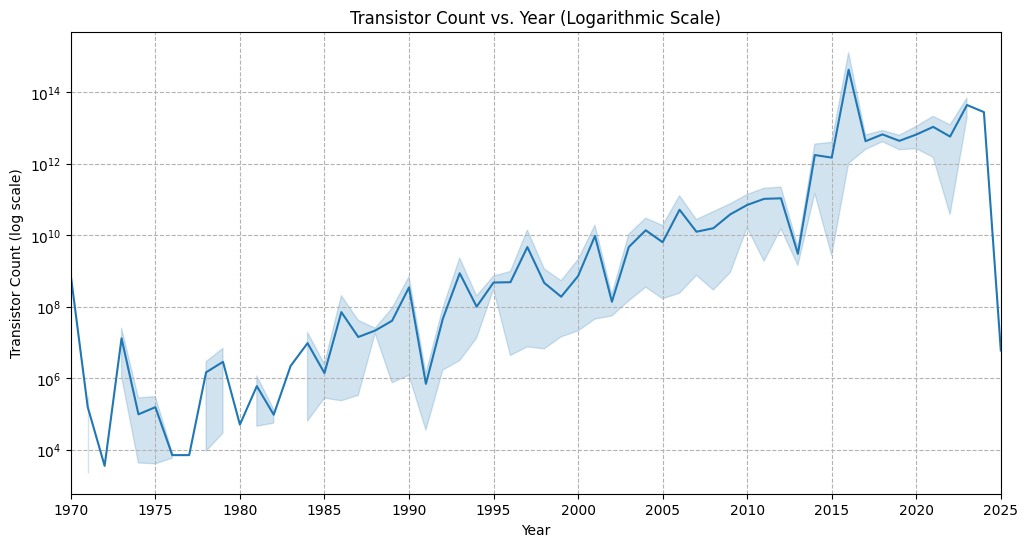

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Transistor count')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Transistor Count (log scale)')
plt.title('Transistor Count vs. Year (Logarithmic Scale)')
plt.grid(True, which="both", ls="--", c='0.7')

# Set x-axis limits and ticks to include 2025
plt.xlim(1970, 2025)
plt.xticks(range(1970, 2030, 5)) # Set ticks every 5 years

plt.show()

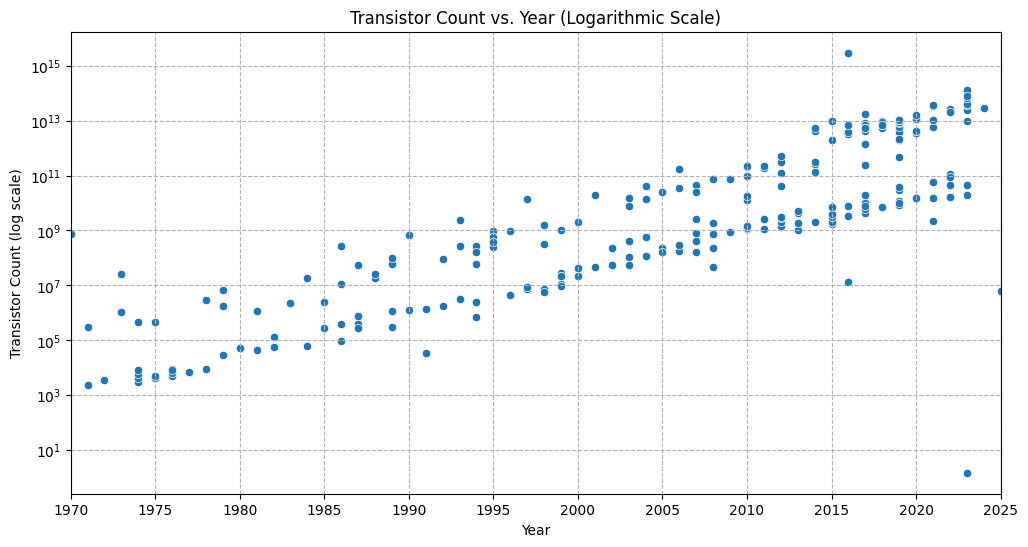

In [ ]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Year', y='Transistor count')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Transistor Count (log scale)')
plt.title('Transistor Count vs. Year (Logarithmic Scale)')
plt.grid(True, which="both", ls="--", c='0.7')

# Set x-axis limits and ticks to include 2025
plt.xlim(1970, 2025)
plt.xticks(range(1970, 2030, 5))  # Set ticks every 5 years

plt.show()


## 7.2 REASONS
The observed downward trend in transistor counts from 2020 to 2025 may result from incomplete or outdated data for recent processors. Inconsistencies in recording transistor counts for newer chips could also cause misinterpretations during data cleaning. Additionally, sparse data points or lower values in later years might create an artificial decline in the line plot. Ensuring a comprehensive dataset and refining the cleaning process would provide a more accurate trend analysis.

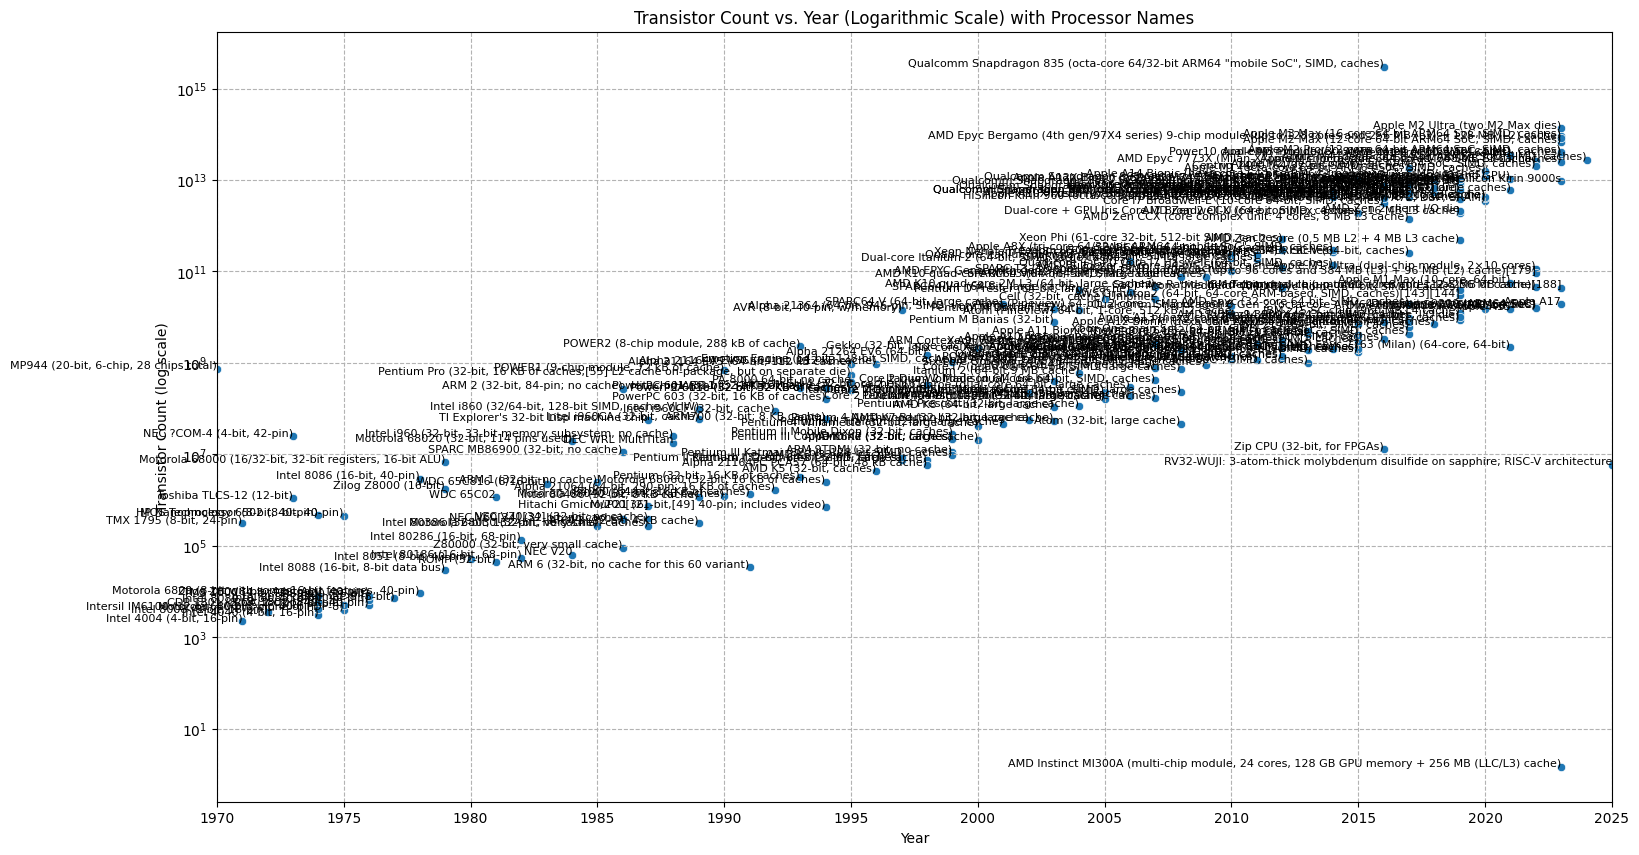

In [ ]:

plt.figure(figsize=(18, 10))
ax = sns.scatterplot(data=df, x='Year', y='Transistor count')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Transistor Count (log scale)')
plt.title('Transistor Count vs. Year (Logarithmic Scale) with Processor Names')
plt.grid(True, which="both", ls="--", c='0.7')

# Set x-axis limits and ticks to include 2025
plt.xlim(1970, 2025)
plt.xticks(range(1970, 2030, 5))  # Set ticks every 5 years

# Add labels for each point
for i, row in df.iterrows():
    ax.text(row['Year'], row['Transistor count'], row['Processor'], fontsize=8, ha='right')

plt.show()

## 7.3 Count Processors per Year

In [ ]:
processor_count_per_year = df.groupby('Year').size().reset_index(name='Number of Processors')

# Filter for years between 1970 and 2025
processor_count_per_year = processor_count_per_year[(processor_count_per_year['Year'] >= 1970) & (processor_count_per_year['Year'] <= 2025)]

display(processor_count_per_year.head())

,Year,Number of Processors
0,1970.0,1
1,1971.0,2
2,1972.0,1
3,1973.0,2
4,1974.0,5


## 7.4 Visualize Number of Processors per Year


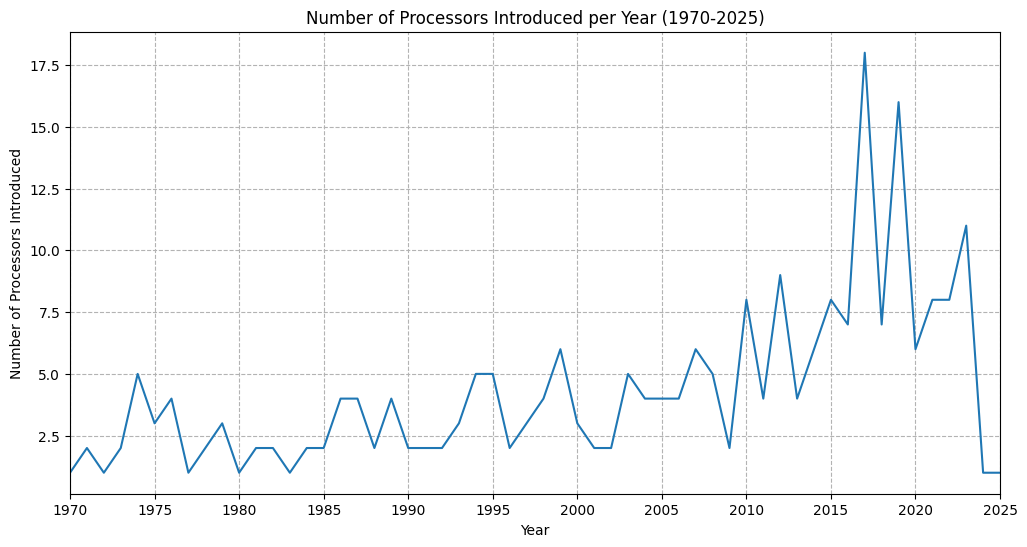

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=processor_count_per_year, x='Year', y='Number of Processors')
plt.xlabel('Year')
plt.ylabel('Number of Processors Introduced')
plt.title('Number of Processors Introduced per Year (1970-2025)')
plt.grid(True, ls="--", c='0.7')
plt.xlim(1970, 2025)
plt.xticks(range(1970, 2030, 5))
plt.show()

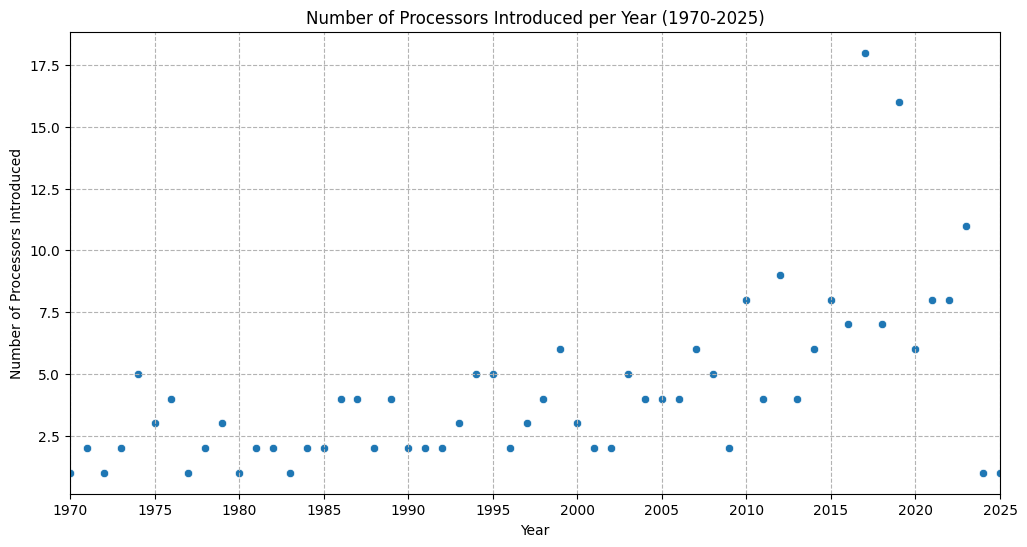

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=processor_count_per_year, x='Year', y='Number of Processors')
plt.xlabel('Year')
plt.ylabel('Number of Processors Introduced')
plt.title('Number of Processors Introduced per Year (1970-2025)')
plt.grid(True, ls="--", c='0.7')
plt.xlim(1970, 2025)
plt.xticks(range(1970, 2030, 5))
plt.show()

## 7.5 Outliers
There are some outliers in the dataset, but we will not go into handling outliers here. Handling outliers often requires careful consideration of the context and the impact on the analysis. For the purpose of this notebook, we will proceed without addressing them to keep the focus on the main analysis steps.